# Question 1
#Part One: Showing 3d Scatter




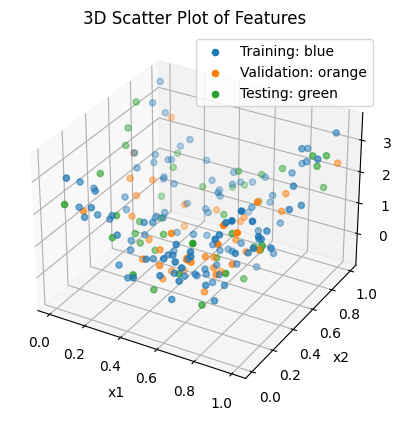

In [26]:
# read the dataset and split into training, validation and testing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

dataframe = pd.read_csv("data_reg.csv")

training_set = dataframe.head(120)
validation_set = dataframe.iloc[120:160]
testing_set = dataframe.iloc[160:200]


# ------------------------------------------First Part------------------------------------------
def plot_3d_plot(training_set, validation_set, testing_set):
    # Plot the sets in a scatter plot
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Scatter for training set
    ax.scatter(training_set['x1'], training_set['x2'], training_set['y'], label='Training: blue')
    # Scatter for validation set
    ax.scatter(validation_set['x1'], validation_set['x2'], validation_set['y'], label='Validation: orange')
    # Scatter for testing set
    ax.scatter(testing_set['x1'], testing_set['x2'], testing_set['y'], label='Testing: green')

    # Add labels and a title
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')
    ax.set_title('3D Scatter Plot of Features')

    # Show the plot
    plt.legend()
    plt.show()


# Plot the sets on 3D plot scatter
plot_3d_plot(training_set, validation_set, testing_set)


In this part, I read the 'data_reg.csv' file and converted it to dataframe, then I just showed the 3d scatter plot, for x1, x2 and the output, for the following sets:

Training set ---> 120 examples,
Validation set ---> 40 examples,
Testing set ---> 40 examples.

The training examples are with blue, validation examples are with orange and testing examples are with green.

# Part Two: Applying Polynomial Regression on the Training Set With Degrees in The range of 1 to 10.


In [27]:
# ------------------------------------------Second Part------------------------------------------

def plot_linear_regression(current_polynomial, model, degree):
    x1 = training_set['x1']
    x2 = training_set['x2']
    y = training_set['y']

    # Create a grid of values for prediction
    x1_values = np.linspace(min(training_set['x1']), max(training_set['x1']), 100)
    x2_values = np.linspace(min(training_set['x2']), max(training_set['x2']), 100)
    x1_grid, x2_grid = np.meshgrid(x1_values, x2_values)
    X_grid = np.column_stack((x1_grid.ravel(), x2_grid.ravel()))

    # Transform the grid using the same polynomial features
    X_grid_poly = current_polynomial.transform(X_grid)

    # Predict the output for the grid of values
    y_pred = model.predict(X_grid_poly)

    # Reshape the predictions to match the grid shape
    y_pred_grid = y_pred.reshape(x1_grid.shape)

    # Plot the data points
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x1, x2, y, c='blue', marker='o', label='Data Points')
    ax.set_title('Linear Regression (Degree {})'.format(degree))
    # Add a legend
    plt.legend()
    ax.plot_surface(x1_grid, x2_grid, y_pred_grid, color='red', alpha=0.5)


    # Plot the surface of the predicted values


    # Set labels
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_zlabel('y')

    # Show the plot
    plt.show()





This function for plotting the models with different degrees. it's main objective is to find the minimum and maximum values for construct the meshgrid for them, and it is a matrix. I convert the meshgrid according to our purpose degree that we have, and found the prediction for it. After thet, I just showed the model we have for different degrees in 3d scatter with x1, x2 and labels as x,y and z coordinates

In [28]:
def get_polynomial_X(X, degree):
    X_poly = np.column_stack((X['x1'], X['x2']))
    current_polynomial = PolynomialFeatures(degree)
    X_current_polynomial = current_polynomial.fit_transform(X_poly)
    return X_current_polynomial

This function is to generate the features for a specific degree instead of generation them manually, I supposed to add the intercept for the features I had ---> by deafault, PolynomialFeatures(degree, include_bias = True).

In [29]:
def get_linear_regression_stuff(X, y, degree):
    X_poly = np.column_stack((X['x1'], X['x2']))
    current_polynomial = PolynomialFeatures(degree)
    X_current_polynomial = current_polynomial.fit_transform(X_poly)

    # Get the linear regression
    model = LinearRegression(fit_intercept=False)

    # Fit the features and the labels
    model.fit(X_current_polynomial, y)

    # Predicted and actual validation
    X_validation_after_poly = get_polynomial_X(X_validation, degree)
    y_predicted_validation = model.predict(X_validation_after_poly)
    # y_validation ---> Actual Validation

    plot_linear_regression(current_polynomial, model, degree)
    W = model.coef_
    return W, y_predicted_validation

This function is to get the linear regression as an API model and the predicted validation after finding the weights and fit the function with input and output. While the function is running, I plot the 3d plot for the current degree in the 10 degrees. I have explained it previously.

In [30]:
def calculate_MSE(y_predicted, y_actual):
    error = (y_predicted - y_actual) ** 2
    error = sum(error)
    MSE = error / len(y_actual)
    return MSE

This function is to find the mean square error for validation set for the current degree in the range between 1 and 10. I calculated the mean square error (let's take for one example) by subtract the predicted validation output got from applyed this example in the linear regression with specific degree and the actual validation output got from the validation dataset, after that I squared the value and added it to the previous error got of the same manner. After I did these steps, I divided the sum by number of examples.

In [31]:
def print_the_MSE(MSE_for_models, flag, lambda_values):
    # printing the result
    min_MSE = min(MSE_for_models)
    min_index = MSE_for_models.index(min_MSE)

    if flag:
        print(
            "The best model for this data points is the model with degree = {}, and it's mean square error on the "
            "validation "
            "set = {}".format(min_index + 1, min_MSE))
    else:
        print(
            "The best model for this data points is the model with regularization parameter = {}, and it's mean "
            "square error on the "
            "validation "
            "set = {}".format(lambda_values[min_index], min_MSE))

This function is to print the minimum mean square error between the mean square erros for the models in range 0 and 10. The reason that I have if-else block, the if statment works when I want to print the minimum mean square. But the else statment is to print when we have the best regularization parameter(we will so it in the next part).

In [32]:
def plot_validation_vs_MSE(MSE_for_models):
    fig, ax = plt.subplots()
    y = MSE_for_models
    x = [i for i in range(1, 11)]

    for i in x:
        circle = plt.Circle((i, y[x.index(i)]), 0.015, color='r',
                            fill=True)  # Here, 0.1 is the radius of the circle
        ax.add_patch(circle)

    # Plot the function
    plt.plot(x, y)

    # Add labels and a legend
    plt.xlabel('Degree')
    plt.ylabel('Validation MSE')
    plt.title('Model Degree VS Validation Error')
    # Show the plot
    plt.show()

This function is to plot the validation mean square error versus degress. The 'for loop' is just to print a circle in the corrosponding x-y axis (I will print the results down).

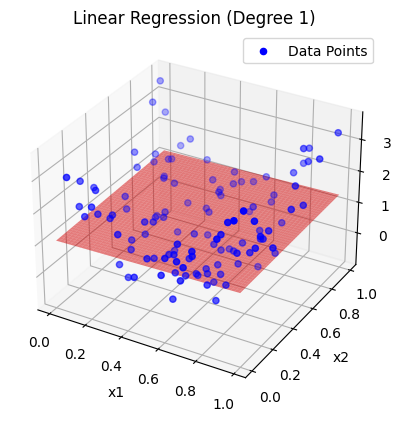

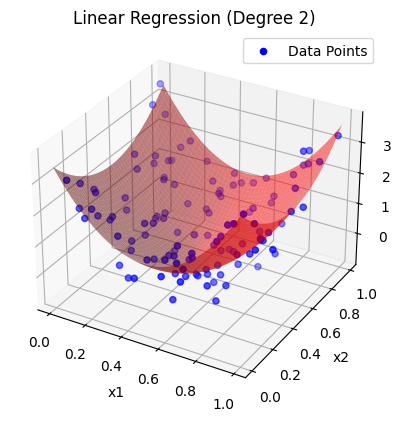

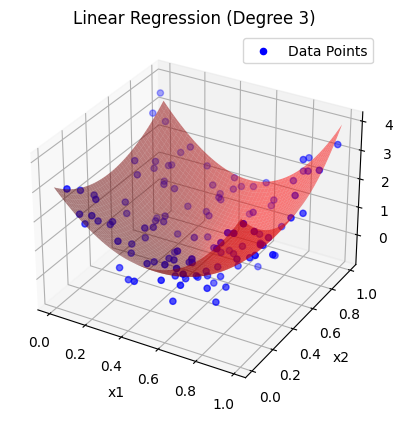

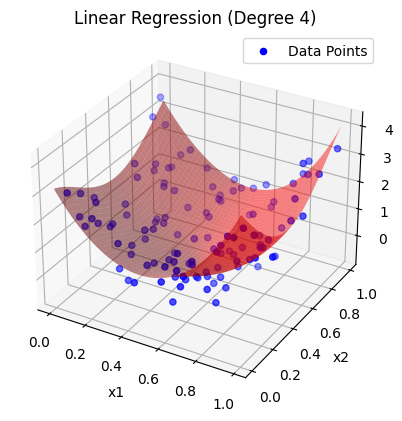

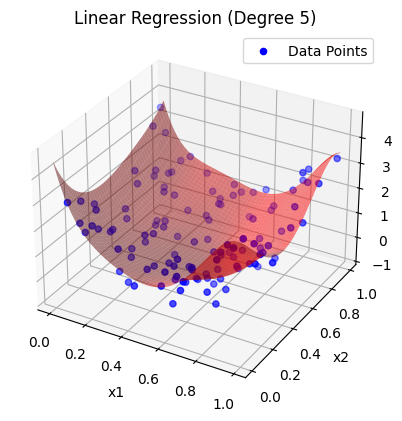

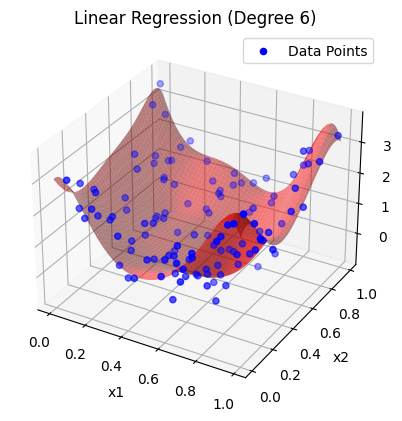

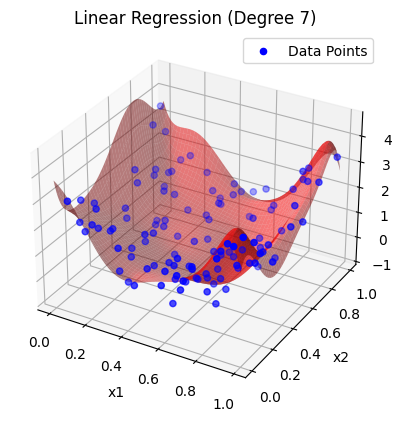

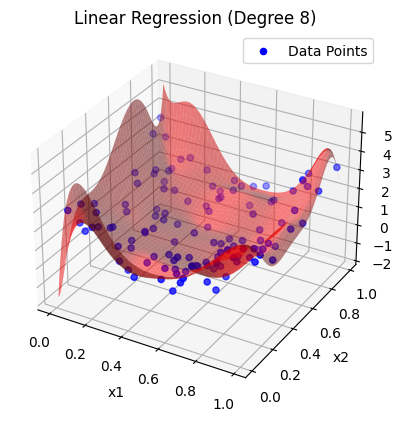

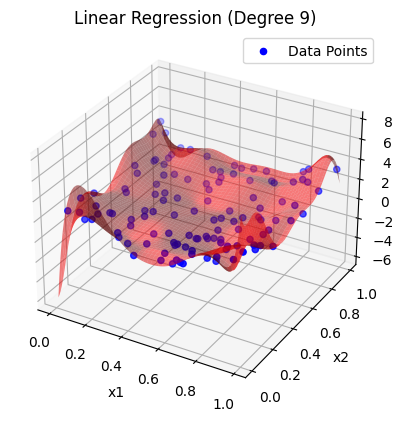

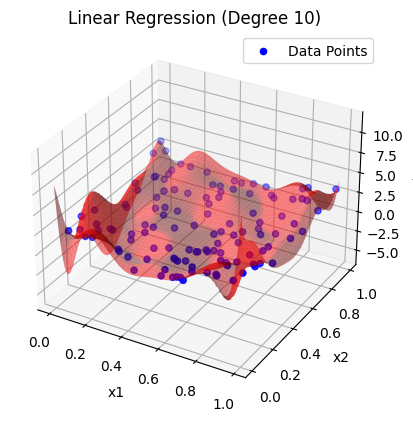

The best model for this data points is the model with degree = 2, and it's mean square error on the validation set = 0.17990349576391812


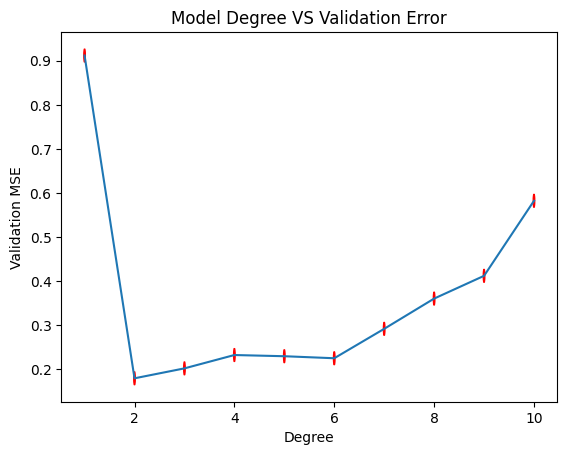

In [33]:
# Iterate 10 times to show the 10 degrees
X_training = training_set[['x1', 'x2']]
y_training = training_set['y']

X_validation = validation_set[['x1', 'x2']]
y_validation = validation_set['y']

MSE_for_models = []

for degree in range(1, 11):
    W, y_validation_predicted = get_linear_regression_stuff(X_training, y_training, degree)
    MSE_for_current_model = calculate_MSE(y_validation_predicted, y_validation)
    MSE_for_models.append(MSE_for_current_model)

print_the_MSE(MSE_for_models, 1, 0)
plot_validation_vs_MSE(MSE_for_models)

This function is the main function for the previous functions. After I decleard the training and validation examples, I iterated 10 times to generate 10 models and to choose the best model depends on the least mean square error between them on the validation set.

***Explination for the output***: as we see, we have 10 models with 10 different mean square erros, I plotted each one in a 3d scatter with datapoints to show each one how they cover the datapoints. We can see that the validation MSE increases when we increase the model degree, because the model has a higher probability to stuck in overfitting problem. For this reason, the training error is less for the highest degrees meanwhile the validation error is very high according to the overfitting problem. **We can conclude that he best model for this data points is the model with degree = 2.**


# Part Three: Applying Ridge Regression on the Training Set to Fit a Polynomial of Degree 8

In [34]:
# ------------------------------------------Third Part------------------------------------------
# Applying Ridge Regression on degree = 8 with lambda = [.001, .005, .01, 0.1, 10]
def apply_ridge_regression(X, y, lambda_value, X_validation_eighth_poly):
    model = Ridge(lambda_value, fit_intercept=False)
    model.fit(X, y)
    W = model.coef_
    y_validation_predicted = model.predict(X_validation_eighth_poly)
    return W, y_validation_predicted

This function is to apply the ridge regrssion API in the training data that we have. I created an object from the Ridge calss and as the previous part, I set the fit_intercept=False, I used the fit function to fit the input features with the labels we have. I return the predicted validation examples and the weights got from the model.

In [35]:
def plot_regularization_parameter_vs_MSE(MSE_for_models, lambda_values):
    y = MSE_for_models
    x = np.log(lambda_values)

    # Plot the function
    plt.plot(x, y)

    # Add labels and a legend
    plt.xlabel('Log Regularization Parameter')
    plt.ylabel('Validation MSE')
    plt.title('Model Regularization Parameter VS Validation Error')
    # Show the plot
    plt.show()

This function is to plot the regularization parameter (lambda) versus mean square error. I take the log scale for the values of lambda to plot log scale versus MSE for validation. (we will explain the results below).

The best model for this data points is the model with regularization parameter = 0.01, and it's mean square error on the validation set = 0.21000748257043278


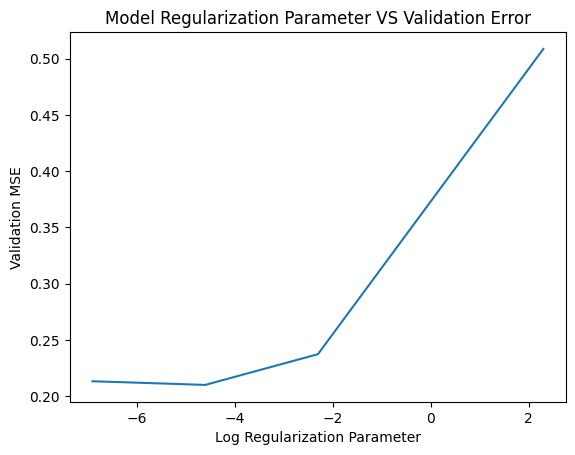

In [36]:
lambda_values = [0.001, 0.005, 0.01, 0.1, 10]
X_training_eighth_poly = get_polynomial_X(X_training, 8)
X_validation_eighth_poly = get_polynomial_X(X_validation, 8)
MSE_for_models = []

for lambda_value in lambda_values:
    W, y_validation_predicted = apply_ridge_regression(X_training_eighth_poly, y_training,
                                                       lambda_value, X_validation_eighth_poly)
    MSE_for_current_model = calculate_MSE(y_validation_predicted, y_validation)
    MSE_for_models.append(MSE_for_current_model)

# Printing the result
print_the_MSE(MSE_for_models, 0, lambda_values)
plot_regularization_parameter_vs_MSE(MSE_for_models, lambda_values)

This is the main function for this part. I defined a list with 5 values for lambda. The procedure is to pick the best lambda which gives the best model for MSE. I tried 5 values for lambda, in each case, I calculated the MSE for the model and finally, the least MSE of them is the best one of corrosponding lambda. **As we see, the best model for this data points is the model with regularization parameter = 0.01, and it's mean square error on the validation set = 0.21000748257043278. As we see, when we increase lambda value, it will remove the impact of the loss function (MSE) and the most impact goes to the regulaizer**.

# Question 2
# Part One:  Learn a Logistic Regression Model With a Linear Decision Boundary

In [37]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures

# ----------------------------------------------------------------------------
training_set = pd.read_csv("train_cls.csv")
testing_set = pd.read_csv("test_cls.csv")


X_training = training_set[['x1', 'x2']]
y_training = training_set['class']

X_testing = testing_set[['x1', 'x2']]
y_actual = testing_set['class']


# ----------------------------------------------------------------------------
# -------------------------------Linear Decision Boundary-------------------------------
def plot_decision_boundary(modelWithLogisticReg, X, y, flag):
    if flag == 'L':

        W = modelWithLogisticReg.coef_
        W = W.flatten()
        min_x1 = min(X['x1'])
        max_x1 = max(X['x2'])
        x1 = np.linspace(min_x1, max_x1, 100)
        x2 = - (W[0] * x1) / W[1]

        # Scatter plot for class 1
        plt.scatter(X['x1'][y == 'C1'], X['x2'][y == 'C1'], color='r', label='C1', marker='x')
        # Scatter plot for class 2
        plt.scatter(X['x1'][y == 'C2'], X['x2'][y == 'C2'], color='b', label='C2', marker='d')
        plt.plot(x1, x2)
        # Set plot labels and title
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.title('Linear Decision Boundary For x1 and x2')
        plt.legend()

        # Display the plot
        plt.grid(True)
        plt.show()

    else:
        # Create meshgrid for x1 and x2 values
        x1_range = np.linspace(min(X_training['x1'] - 1), max(X_training['x1'] + 1), 100)
        x2_range = np.linspace(min(X_training['x2'] - 1), max(X_training['x2'] + 1), 100)

        # Create meshgrid
        x1_mesh, x2_mesh = np.meshgrid(x1_range, x2_range)

        # Flatten the meshgrid matrices and create a design matrix with polynomial features
        X_mesh = np.column_stack((x1_mesh.ravel(), x2_mesh.ravel()))  # only original features
        X_poly = PolynomialFeatures(2).fit_transform(X_mesh)  # ensure include_bias is True

        # Predict probabilities using the model
        y_pred_prob = modelWithLogisticReg.predict_proba(X_poly)[:, 1]  # probability of the positive class

        # Reshape y_pred_prob to match the shape of the meshgrid
        y_pred_prob = y_pred_prob.reshape(x1_mesh.shape)

        # Plot decision boundary where the probability is 0.5
        plt.contour(x1_mesh, x2_mesh, y_pred_prob, levels=[0.5], colors='green', linewidths=2)

        # Scatter plot for class 1
        plt.scatter(X_training['x1'][y == 'C1'], X_training['x2'][y == 'C1'], color='r', label='C1', marker='x')
        # Scatter plot for class 2
        plt.scatter(X_training['x1'][y == 'C2'], X_training['x2'][y == 'C2'], color='b', label='C2', marker='d')

        # Set plot labels and title
        plt.xlabel('x1')
        plt.ylabel('x2')
        plt.title('Quadratic Decision Boundary For x1 and x2')
        plt.legend()

        # Display the plot
        plt.grid(True)
        plt.show()

This function is to plot the decision boundary for the two cases: linear and quadratic. For the linear case, x2 = - (W[0] * x1) / W[1], this equation is to find the new values to plot the figure depends on the values of W[0] and W[1] got from the linear regression case. I plotted the scatter for the two classes, each class represents with different shape. In the second case, I plotted the quadratic case, I explianed it before, but it's general manner depends on the mesh grid and showed the output in a scatter with the two classes

In [38]:
def display_accuracy(y_predicted_training, y_actual_training, y_predicted_testing, y_actual_testing):
    # Training Accuracy
    training_accuracy = accuracy_score(y_predicted_training, y_actual_training)
    print("Accuracy for training data = {:.2f}%".format(float(training_accuracy * 100)))

    # Testing Accuracy
    testing_accuracy = accuracy_score(y_predicted_testing, y_actual_testing)
    print("Accuracy for testing data = {:.2f}%".format(float(testing_accuracy * 100)))

This function is to calculate the accuracy and print it by the API for the training and testing data. The idea of the accuracy is to find the true values that the classifier return (true negative and true positive). ----> We will explain the results below.

In [39]:
def compute_logistic_regression_stuff(X, y, X_testing):
    # Linear decision boundary Logistic Regression
    model = LogisticRegression(fit_intercept=False)
    # Fit X and Y
    model.fit(X, y)
    # Compute predicted training
    y_predicted_training = model.predict(X)

    # Compute predicted testing
    y_predicted_testing = model.predict(X_testing)

    return model, y_predicted_training, y_predicted_testing

This function is to return the classifier weights got from the logistic regression API, output training predictions and output testing predictions.

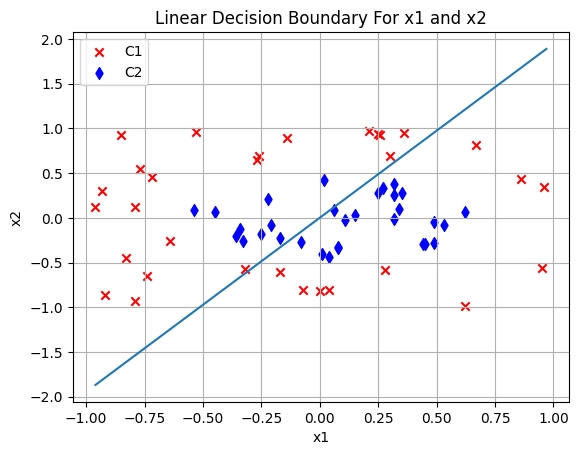

In case of linear decision boundary:
Accuracy for training data = 67.74%
Accuracy for testing data = 63.64%


In [40]:
# In case of linear decision boundary
model, y_predicted_training, y_predicted_testing = \
    compute_logistic_regression_stuff(X_training, y_training, X_testing)
plot_decision_boundary(model, X_training, y_training, 'L')
print("In case of linear decision boundary:")
display_accuracy(y_predicted_training, y_training, y_predicted_testing, y_actual)

This is the main function for the previous functions. Its idea is to assemply all the function and find the accuracy of the training and testing data.


***Explination for the output***: as we see, we have two classes, C1 and C2. I plotted the linear regression for this classifier. We can see that the accuracy for training = 67.75%, which is not good enough, and the meaning of that, this classifier cannot understand even the training data. When I tested the classifier on the testing set, the accuracy was 63.64%, and this is a bad accuracy. We can conclude that this classifer is underfitting classifier.

# Part Two:  Learn a Logistic Regression Model With a Quadratic Decision Boundary

In [24]:
# -------------------------------Quadratic Decision Boundary-------------------------------

def get_polynomial_X(X, degree):
    X_poly = np.column_stack((X['x1'], X['x2']))
    current_polynomial = PolynomialFeatures(degree)
    X_current_polynomial = current_polynomial.fit_transform(X_poly)
    return X_current_polynomial

This function is to get the needed features for different degrees (in our case, it is = 2). The main objective is by using the API PolynomialFeatures(degree), and return the new features.

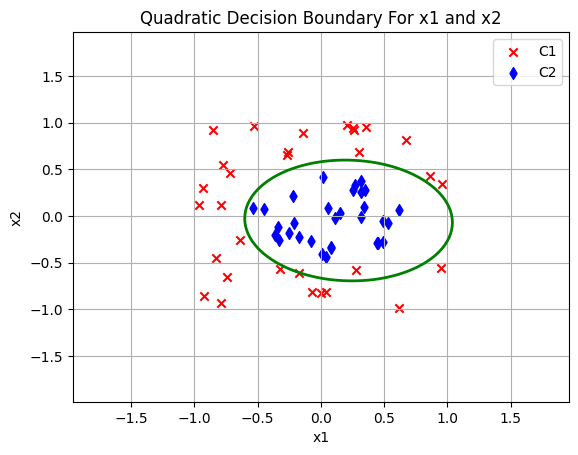



In case of Quadratic decision boundary:
Accuracy for training data = 98.39%
Accuracy for testing data = 95.45%


In [25]:
# In case of quadratic decision boundary
X_quadratic_learning = get_polynomial_X(X_training, 2)
X_quadratic_testing = get_polynomial_X(X_testing, 2)

modelWithLogisticReg, y_predicted_training, y_predicted_testing = compute_logistic_regression_stuff \
    (X_quadratic_learning, y_training, X_quadratic_testing)
# We can notice that we have 10 learning parameters because we have three features (x0, x1 and x2)
plot_decision_boundary(modelWithLogisticReg, X_training, y_training, 'Q')
print("\n\nIn case of Quadratic decision boundary:")
display_accuracy(y_predicted_training, y_training, y_predicted_testing, y_actual)

This is the main function for all the previous functions. Note that I used the same functions for both: Linear and Quadratic case.

***Explination for the output***: as we see, we have two classes, C1 and C2. I plotted the Quadratic regression for this classifier. We can see that the accuracy for training = 98.39%, which is good enough, and the meaning of that, this classifier can understand the training data perfectly. When I tested the classifier on the testing set, the accuracy was 95.45%, and this is a good accuracy. We can conclude that this classifer is goodfit classifier.

***Note: If we remove the class 1 that lies in the countour (which is noise) there is a high a probability to lie in the overfitting problem.***